In [1]:
import numpy as np
from sklearn import datasets
import time
import matplotlib.pyplot as plt
import math

In [2]:
def compute_distance_naive(X):
    N = X.shape[0]      # num of rows
    D = X[0].shape[0]   # num of cols
    
    M = np.zeros([N,N])
    
    for i in range(N):
        xi = X[i,:] #calculate the Euclidean distance between xi and all the other vector(including itself)
        for j in range(N):
            xj = X[j,:] #calculate the Euclidean distance between xj and xi
            dist = np.square(xi-xj) #element wise subtraction between the two vectors and then squaring the difference
            dist = np.sum(dist,axis = 0) #adding the vector(after squaring in the line above)
            dist = np.sqrt(dist) # finally taking out the square root of the sum
                                # the whole step can be summarized into the Euclidean distance formula
            M[i,j] = dist #storing the Euclidean distance of each pair
            
    return M

In [3]:
def compute_distance_smart(X):
    N = X.shape[0]  # num of rows
    D = X[0].shape[0]  # num of cols
    
    # use X to create M
    M = np.zeros([N, N])
    
    #using the formula: ||xi - xj|| = sqrt(||xi||^2 - 2transpose(xi)xj + ||xj||^2)
    
    # ||xi||^2, but calculating the distance of all the vectors at once using matrix dot product
    V_length = np.square(X) #using the fact: x * x = ||x||^2
    V_length = np.sum(V_length, axis = 1) #summing the value to get the length of the vectors

    # -2transpose(xi)xj
    X_T = np.transpose(X)
    matrix_prod = -2 * np.dot(X, X_T)

    #transpose of matrix is an inexpensive operation O(1) as numpy just swaps the shape and stride information for each axis
    M1 = np.add(np.transpose(matrix_prod), V_length)
    
    #sqrt(||xi||^2 - 2transpose(xi)xj + ||xj||^2), finally taking the square of the whole result
    M = np.sqrt(np.abs(np.add(np.transpose(M1), V_length)))
    
    return M

In [4]:
def compute_correlation_naive(X):
    N = X.shape[0]  # num of rows
    D = X[0].shape[0]  # num of cols
    
    #calculating the sample mean of X beforehand
    mean = (np.sum(X, axis = 0))/N
    
    #calcuting the sample mean of X beforehand
    X = X - mean

    S = np.zeros([D, D])
    
    for i in range(D):
        xi = X[:, i]
        for j in range(D):
            xj = X[:, j] 
            prod = xi * xj #element wise multiplication of two vectors
            sum = np.sum(prod, axis = 0) #adding the result of the above line
            cov_var = sum / (N-1) #finally completing the formula to calcualte the sample covariance matrix
            S[i,j] = cov_var
    
    #as divisions are performed in subsequent lines, ignoring the value for division by zero
    np.seterr(invalid='ignore')
    stand_dev = np.diag(np.sqrt(np.abs(S))) #calculating the standard deviation
    
    corr_max = S / stand_dev #dividing the sample covariance matrix by the first denominator
    corr_max = np.transpose(corr_max) #performing transpose to divide by the second denominator
    corr_max = corr_max / stand_dev   #dividing it by the second denominator

    return corr_max

In [5]:
def compute_correlation_smart(X):
    N = X.shape[0]  # num of rows
    D = X[0].shape[0]  # num of cols

    # use X to create M
    M = np.zeros([D, D])
    
    #calculating the sample mean of X beforehand
    mean = (np.sum(X, axis = 0))/N
    X = X - mean

    X_T = np.transpose(X)
    
    #using dot product of X's tranpose and X instead of using loops
    M1 = np.dot(X_T, X)
    
    #as divisions are performed in subsequent lines, ignoring the value for division by zero
    np.seterr(invalid='ignore')
    
    S = M1 / (N-1) #finally completing the formula to calcualte the sample covariance matrix
    stand_dev = np.diag(np.sqrt(np.abs(S)))#calculating the standard deviation
    
    corr_max = S/stand_dev  #dividing the sample covariance matrix by the first denominator
    corr_max = np.transpose(corr_max)  #performing transpose to divide by the second denominator
    corr_max = corr_max / stand_dev #dividing it by the second denominator

    return corr_max

In [6]:
#the function estimates the mean running time of the three datasets(Iris, Digits and Breast Cancer), with and without loops
def compute_sk_datasets(X, data_name):
    perf_dist_loop = np.zeros([5])  # 5 trials
    perf_dist_cool = np.zeros([5])
    perf_corr_loop = np.zeros([5])  # 5 trials
    perf_corr_cool = np.zeros([5])
 
    for i in range(5):
        # compute distance matrices
        st = time.time()
        dist_loop = compute_distance_naive(X)
        et = time.time()
        perf_dist_loop[i] = et - st              # time difference

        st = time.time()
        dist_cool = compute_distance_smart(X)
        et = time.time()
        perf_dist_cool[i] = et - st

        # compute correlation matrices
        st = time.time()
        corr_loop = compute_correlation_naive(X)
        et = time.time()
        perf_corr_loop[i] = et - st              # time difference

        st = time.time()
        corr_cool = compute_correlation_smart(X)
        et = time.time()
        perf_corr_cool[i] = et - st
        
    mean_dist_loop = np.mean(perf_dist_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
    mean_dist_cool = np.mean(perf_dist_cool, axis = 0)

    mean_corr_loop = np.mean(perf_corr_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
    mean_corr_cool = np.mean(perf_corr_cool, axis = 0)

    print("Computational times for ", data_name, " dataset")

    print("The average time to compute distance matrix using loop is: ", mean_dist_loop, " seconds")
    print("The average time to compute distance matrix using matrix operation is: ", mean_dist_cool, " seconds")

    print("The average time to compute correlation matrix using loop is: ", mean_corr_loop, " seconds")
    print("The average time to compute correlation matrix using matrix operation is: ", mean_corr_cool, " seconds")

In [7]:
def main():
    print ('starting comparing distance computation .....')
    np.random.seed(100)
    params = range(10,141,10)   # different param setting
    nparams = len(params)       # number of different parameters

    perf_dist_loop = np.zeros([10,nparams])  # 10 trials = 10 rows, each parameter is a column
    perf_dist_cool = np.zeros([10,nparams])
    perf_corr_loop = np.zeros([10,nparams])  # 10 trials = 10 rows, each parameter is a column
    perf_corr_cool = np.zeros([10,nparams])

    counter = 0

    for ncols in params:
        nrows = ncols * 10

        print ("matrix dimensions: ", nrows, ncols)

        for i in range(10):
            X = np.random.rand(nrows, ncols)   # random matrix

            # compute distance matrices
            st = time.time()
            dist_loop = compute_distance_naive(X)
            et = time.time()
            perf_dist_loop[i,counter] = et - st              # time difference

            st = time.time()
            dist_cool = compute_distance_smart(X)
            et = time.time()
            perf_dist_cool[i,counter] = et - st

            assert np.allclose(dist_loop, dist_cool, atol=1e-06) # check if the two computed matrices are identical all the time

            # compute correlation matrices
            st = time.time()
            corr_loop = compute_correlation_naive(X)
            et = time.time()
            perf_corr_loop[i,counter] = et - st              # time difference

            st = time.time()
            corr_cool = compute_correlation_smart(X)
            et = time.time()
            perf_corr_cool[i,counter] = et - st

            assert np.allclose(corr_loop, corr_cool, atol=1e-06) # check if the two computed matrices are identical all the time

        counter = counter + 1

    mean_dist_loop = np.mean(perf_dist_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
    mean_dist_cool = np.mean(perf_dist_cool, axis = 0)
    std_dist_loop = np.std(perf_dist_loop, axis = 0)      # standard deviation
    std_dist_cool = np.std(perf_dist_cool, axis = 0)

    plt.figure(1)
    plt.errorbar(params, mean_dist_loop[0:nparams], yerr=std_dist_loop[0:nparams], color='red',label = 'Loop Solution for Distance Comp')
    plt.errorbar(params, mean_dist_cool[0:nparams], yerr=std_dist_cool[0:nparams], color='blue', label = 'Matrix Solution for Distance Comp')
    plt.xlabel('Number of Cols of the Matrix')
    plt.ylabel('Running Time (Seconds)')
    plt.title('Comparing Distance Computation Methods')
    plt.legend()
    plt.savefig('CompareDistanceCompFig.pdf')
    # plt.show()    # uncomment this if you want to see it right way
    print ("result is written to CompareDistanceCompFig.pdf")

    mean_corr_loop = np.mean(perf_corr_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
    mean_corr_cool = np.mean(perf_corr_cool, axis = 0)
    std_corr_loop = np.std(perf_corr_loop, axis = 0)      # standard deviation
    std_corr_cool = np.std(perf_corr_cool, axis = 0)

    plt.figure(2)
    plt.errorbar(params, mean_corr_loop[0:nparams], yerr=std_corr_loop[0:nparams], color='red',label = 'Loop Solution for Correlation Comp')
    plt.errorbar(params, mean_corr_cool[0:nparams], yerr=std_corr_cool[0:nparams], color='blue', label = 'Matrix Solution for Correlation Comp')
    plt.xlabel('Number of Cols of the Matrix')
    plt.ylabel('Running Time (Seconds)')
    plt.title('Comparing Correlation Computation Methods')
    plt.legend()
    plt.savefig('CompareCorrelationCompFig.pdf')
    # plt.show()    # uncomment this if you want to see it right way
    print ("result is written to CompareCorrelationCompFig.pdf")
    
    
    iris = datasets.load_iris()
    compute_sk_datasets(iris.data, "Iris")
    
    digits = datasets.load_digits()
    compute_sk_datasets(digits.data, "Digits")
    
    breast_cancer = datasets.load_breast_cancer()
    compute_sk_datasets(breast_cancer.data, "Breast Cancer")

starting comparing distance computation .....
matrix dimensions:  100 10
matrix dimensions:  200 20
matrix dimensions:  300 30
matrix dimensions:  400 40
matrix dimensions:  500 50
matrix dimensions:  600 60
matrix dimensions:  700 70
matrix dimensions:  800 80
matrix dimensions:  900 90
matrix dimensions:  1000 100
matrix dimensions:  1100 110
matrix dimensions:  1200 120
matrix dimensions:  1300 130
matrix dimensions:  1400 140
result is written to CompareDistanceCompFig.pdf
result is written to CompareCorrelationCompFig.pdf
Computational times for  Iris  dataset
The average time to compute distance matrix using loop is:  0.482045316696167  seconds
The average time to compute distance matrix using matrix operation is:  0.0  seconds
The average time to compute correlation matrix using loop is:  0.0021715641021728517  seconds
The average time to compute correlation matrix using matrix operation is:  0.0  seconds
Computational times for  Digits  dataset
The average time to compute dista

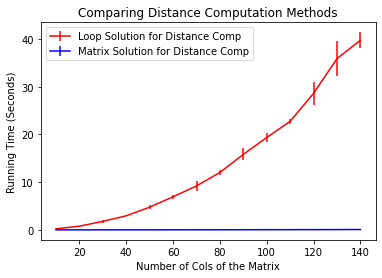

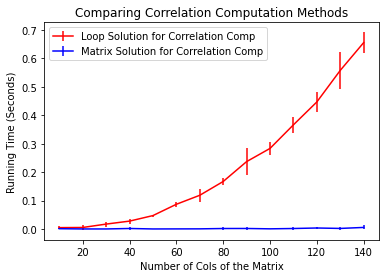

In [8]:
if __name__ == "__main__": main()

In [28]:
digits = datasets.load_digits()
print(digits.data.shape)
    
breast_cancer = datasets.load_breast_cancer()
A = breast_cancer.target
A[A == 0] = -1
# print(np.where(A > 0)[0][0])
(A<0).sum()
# print(breast_cancer.data)

(1797, 64)


212

In [72]:
iris = datasets.load_iris()
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

st = time.time()
compute_distance_smart(breast_cancer.data)
et = time.time()

print("Time taken ", et - st)

st = time.time()
compute_distance_naive(breast_cancer.data)
et = time.time()

print("Time taken ", et - st)

# compute correlation matrices
st = time.time()
compute_correlation_smart(breast_cancer.data)
et = time.time()

print("Time taken ", et - st)

st = time.time()
compute_correlation_naive(breast_cancer.data)
et = time.time()

print("Time taken ", et - st)

Time taken  0.011458635330200195
Time taken  5.951224327087402
Time taken  0.0
Time taken  0.03272604942321777


In [67]:
p = np.zeros([5])
print(p)

[0. 0. 0. 0. 0.]
